Using data from http://www.causality.inf.ethz.ch/data/LUCAS.html

In [1]:
import os
import sys
import pandas as pd
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from aitia_explorer.py_causal_wrapper import PyCausalWrapper 

In [2]:
wrapper = PyCausalWrapper()

In [3]:
data_dir = os.path.join('..', 'test/resources/data/lucas0_train.csv')

In [4]:
df = pd.read_table(data_dir, sep=",")
df

,Smoking,Yellow_Fingers,Anxiety,Peer_Pressure,Genetics,Attention_Disorder,Born_an_Even_Day,Car_Accident,Fatigue,Allergy,Coughing,Lung_cancer
0,0,0,1,0,0,1,0,1,0,1,0,0
1,0,1,0,0,0,0,1,0,1,0,1,1
2,1,1,1,0,1,1,1,1,1,1,1,1
3,0,0,0,1,0,0,1,0,0,0,0,0
4,1,1,1,0,0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,0,0,1,1,0,1,1
1996,1,1,1,0,0,0,0,0,1,0,1,1
1997,1,1,0,1,0,0,1,0,1,0,0,1
1998,1,1,1,0,1,1,0,1,1,0,1,1


In [5]:
dot_str = wrapper.algo_bayes_est(df)
dot_str

'digraph g {\n "Peer_Pressure" -> "Smoking" [arrowtail=none, arrowhead=none]; \n "Allergy" -> "Coughing" [arrowtail=none, arrowhead=normal]; \n "Attention_Disorder" -> "Genetics" [arrowtail=none, arrowhead=none]; \n "Smoking" -> "Yellow_Fingers" [arrowtail=none, arrowhead=none]; \n "Lung_cancer" -> "Smoking" [arrowtail=none, arrowhead=none]; \n "Attention_Disorder" -> "Car_Accident" [arrowtail=none, arrowhead=normal]; \n "Genetics" -> "Lung_cancer" [arrowtail=none, arrowhead=none]; \n "Fatigue" -> "Lung_cancer" [dir=both, arrowtail=normal, arrowhead=none]; \n "Coughing" -> "Lung_cancer" [dir=both, arrowtail=normal, arrowhead=none]; \n "Car_Accident" -> "Fatigue" [dir=both, arrowtail=normal, arrowhead=none]; \n "Anxiety" -> "Smoking" [arrowtail=none, arrowhead=none]; \n "Coughing" -> "Fatigue" [arrowtail=none, arrowhead=normal]; \n}'

In [6]:
causal_graph = wrapper.get_causal_graph_from_dot(dot_str)
causal_graph

CausalGraphicalModel(Allergy, Anxiety, Attention_Disorder, Car_Accident, Coughing, Fatigue, Genetics, Lung_cancer, Peer_Pressure, Smoking, Yellow_Fingers)

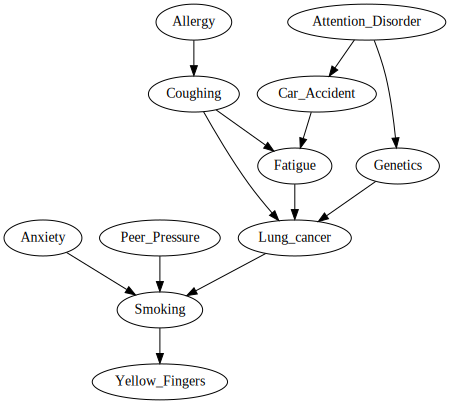

In [7]:
causal_graph.draw()